imports

In [20]:
import re 
# Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option("display.max_rows", None,"display.max_columns", None)
warnings.simplefilter(action='ignore')
plt.style.use('seaborn')

# Algorithmes
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix
from IPython.display import Image

import stylecloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mati\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mati\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


data collection (WELFake Dataset)

In [21]:
df=pd.read_csv("dataset.csv")
df.head()

Unnamed: 0                                              title  \
0           0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1           1                                                NaN   
2           2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3           3  Bobby Jindal, raised Hindu, uses story of Chri...   
4           4  SATAN 2: Russia unvelis an image of its terrif...   

                                                text  label  
0  No comment is expected from Barack Obama Membe...      1  
1     Did they post their votes for Hillary already?      1  
2   Now, most of the demonstrators gathered last ...      1  
3  A dozen politically active pastors came here f...      0  
4  The RS-28 Sarmat missile, dubbed Satan 2, will...      1

In [22]:
df.shape

(72134, 4)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [24]:
def check(df):
    l=[]
    columns = df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['column','dtypes','nunique','sum_null']
    return df_check 
check(df)

column  dtypes  nunique  sum_null
0  Unnamed: 0   int64    72134         0
1       title  object    62347       558
2        text  object    62718        39
3       label   int64        2         0

In [25]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [26]:
df.dropna(inplace=True)

In [27]:
df.duplicated().sum()

8416

In [28]:
#delete duplicate rows
df.drop_duplicates(inplace=True)

In [29]:
df.head

<bound method NDFrame.head of                                                    title  \
0      LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
2      UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3      Bobby Jindal, raised Hindu, uses story of Chri...   
4      SATAN 2: Russia unvelis an image of its terrif...   
5      About Time! Christian Group Sues Amazon and SP...   
6      DR BEN CARSON TARGETED BY THE IRS: “I never ha...   
7      HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...   
8      Sports Bar Owner Bans NFL Games…Will Show Only...   
9      Latest Pipeline Leak Underscores Dangers Of Da...   
10      GOP Senator Just Smacked Down The Most Puncha...   
11     May Brexit offer would hurt, cost EU citizens ...   
12     Schumer calls on Trump to appoint official to ...   
13     WATCH: HILARIOUS AD Calls Into Question Health...   
14     No Change Expected for ESPN Political Agenda D...   
15     Billionaire Odebrecht in Brazil scandal releas...   
16     BRI

EDA

In [30]:
#df['label'] = df['label'].replace({0: 'Fake', 1: 'Real'})

[Text(0, 0, '0'), Text(1, 0, '1')]

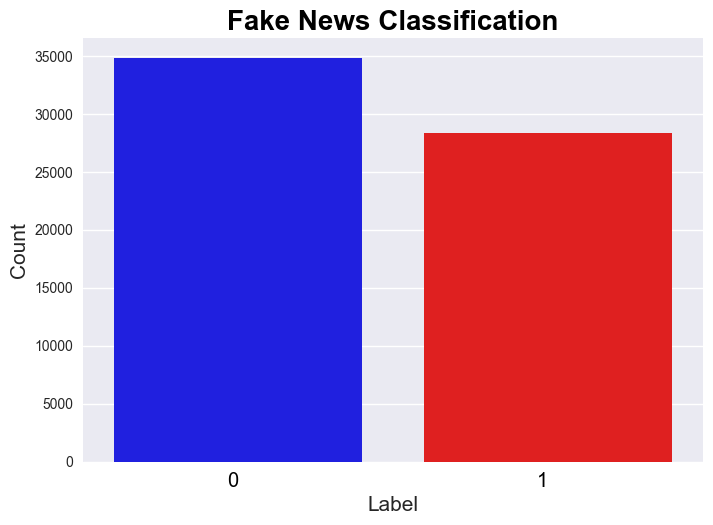

In [31]:
chart = sns.countplot(x='label', data=df, palette=['blue', 'red'])
plt.title('Fake News Classification', fontsize=20, fontweight='bold', color='black')
plt.xlabel('Label', fontsize=15), 
plt.ylabel('Count', fontsize=15)
chart.set_xticklabels(chart.get_xticklabels(), horizontalalignment='right', fontweight='light', fontsize='x-large', color='black')

feature engineering

In [32]:
df['txt']=df['title']+' '+df['text']
df.drop(columns=['title','text'],inplace=True)


In [33]:
tl = WordNetLemmatizer()
corpus = []
for i in np.arange(len(df)):
    result =re.sub(r'[^a-zA-Z]',' ',df.iloc[i]['txt'])
    result=result.lower()
    result=result.split()
    result=[tl.lemmatize(word) for word in result if word not in stopwords.words('english')]
    result=" ".join(result)
    corpus.append(result)

KeyboardInterrupt: 

In [ ]:
x = np.array(corpus)
y = np.array(df['label'])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=24, shuffle= True)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((50496,), (12625,), (50496,), (12625,))

In [ ]:
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,3))

In [ ]:
# fit the vectorizer and transform X_train into a tf-idf matrix,
# then use the same vectorizer to transform X_test

x_train = tfidf.fit_transform(x_train).toarray()
x_test = tfidf.transform(x_test).toarray()

Modelling

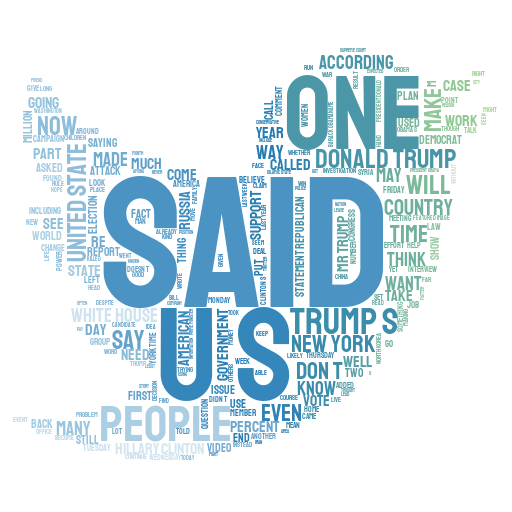

In [ ]:
stylecloud.gen_stylecloud(text=" ".join(df['txt']), 
                          icon_name='fab fa-twitter',
                          palette='colorbrewer.qualitative.Paired_3', 
                          background_color='white',
                          gradient='horizontal')
Image('stylecloud.png')

SweetViz

In [ ]:
import sweetviz as sv

# Summary of the dataset
analysis = sv.analyze(df)
analysis.show_html('EDA-FAKENEWSCLASSIFICATION-Sweetviz.html', open_browser=False)

#Dislay resuls in the notebook
import IPython
ip = IPython.display.IFrame(src='EDA-Matti-Sweetviz.html', width=1000, height=600)


Comparison report

In [ ]:
compare_report = sv.compare([x_train, 'Train'], [x_test, 'Test'])
compare_report.show_html('EDA-Matti-Sweetviz-Compare.html', open_browser=False)

Histograms

In [ ]:
df.hist(column=['class'], figsize=(10,10), color='blue', alpha=0.5, bins=50, grid=False)

for i in df.columns:
    print(f'{i}')
    plt.hist(df[i])
    plt.tight_layout()
    plt.show()

In [ ]:
sns.pairplot(data = df)
plt.show()

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [ ]:
for column in df.columns:
    df[column].plot.kde(label=column)
    plt.legend()
    plt.show

In [ ]:
train_score = []
test_score = []
CV = []

def algorithm(model):
    #training model
    model.fit(x_train, y_train)
    
    #score of training model
    train_model_score = model.score(x_train, y_train)
    train_score.append(round(train_model_score, 2))
    y_pred_train = model.predict(x_train)
    
    #score of test set
    test_model_score = model.score(x_test, y_test)
    test_score.append(round(test_model_score, 2))
    y_pred_test = model.predict(x_test)
    
    #train set using cross validation
    cross_val = cross_val_score(model, x_train, y_train, cv=10)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean, 2))
    
    #printing values
    print('Train set score: ', train_model_score)
    print('Test set score: ', test_model_score)
    print('Cross validation score: ', cv_mean)
    
    df_model = pd.DataFrame(classification_report(y_pred_test,y_test, digits=2,output_dict=True)).T
    df_model['support'] = df_model.support.apply(int)
    df_model.style.background_gradient(cmap='viridis',subset=pd.IndexSlice['0':'9', :'f1-score'])
    display(df_model)
    
    print('Confusion Matrix')
    conf_mat = confusion_matrix(y_pred_test, y_test)
    plot_confusion_matrix(conf_mat, figsize=(8,8), hide_ticks=True, cmap=plt.cm.Blues, show_normed=True, colorbar=True, class_names=['Fake','Real'])
    
    plt.show()

GaussianNb

Train set score:  0.8612365335868187
Test set score:  0.8521188118811881
Cross validation score:  0.853968863553022


precision    recall  f1-score  support
0              0.835692  0.888139  0.861117     6517
1              0.872083  0.813687  0.841873     6108
accuracy       0.852119  0.852119  0.852119        0
macro avg      0.853887  0.850913  0.851495    12625
weighted avg   0.853298  0.852119  0.851807    12625

Confusion Matrix


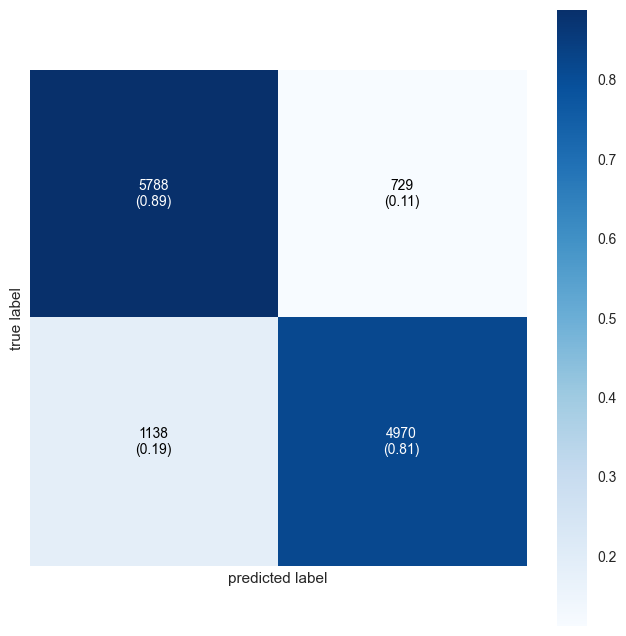

In [ ]:
gnv = GaussianNB()
algorithm(gnv)

BernoulliNB

Train set score:  0.8429380544993663
Test set score:  0.8411881188118812
Cross validation score:  0.8415123786888493


precision    recall  f1-score  support
0              0.808259  0.892112  0.848118     6275
1              0.881207  0.790866  0.833596     6350
accuracy       0.841188  0.841188  0.841188        0
macro avg      0.844733  0.841489  0.840857    12625
weighted avg   0.844950  0.841188  0.840814    12625

Confusion Matrix


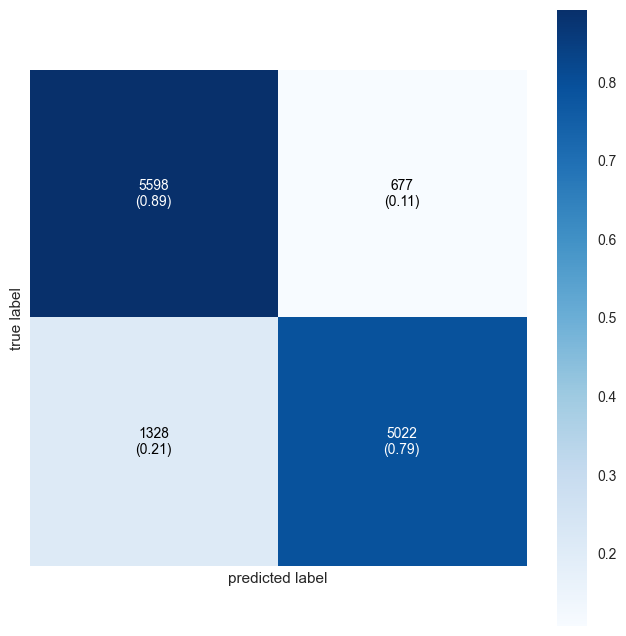

In [ ]:
bnv = BernoulliNB()
algorithm(bnv)

MLPClassifier

Train set score:  0.9999405893536122
Test set score:  0.9473267326732673
Cross validation score:  0.9421339467280061


precision    recall  f1-score  support
0              0.962605  0.942599  0.952497     7073
1              0.928759  0.953350  0.940894     5552
accuracy       0.947327  0.947327  0.947327        0
macro avg      0.945682  0.947974  0.946695    12625
weighted avg   0.947721  0.947327  0.947394    12625

Confusion Matrix


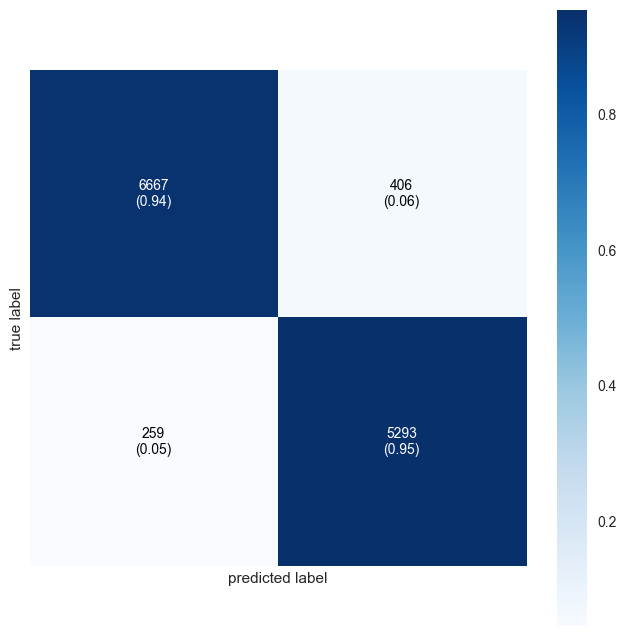

In [ ]:
mlp = MLPClassifier()
algorithm(mlp)

RandomForest

Train set score:  1.0
Test set score:  0.951049504950495
Cross validation score:  0.9496593855463977


precision    recall  f1-score  support
0              0.958418  0.952641  0.955520     6968
1              0.942095  0.949090  0.945579     5657
accuracy       0.951050  0.951050  0.951050        0
macro avg      0.950256  0.950865  0.950550    12625
weighted avg   0.951104  0.951050  0.951066    12625

Confusion Matrix


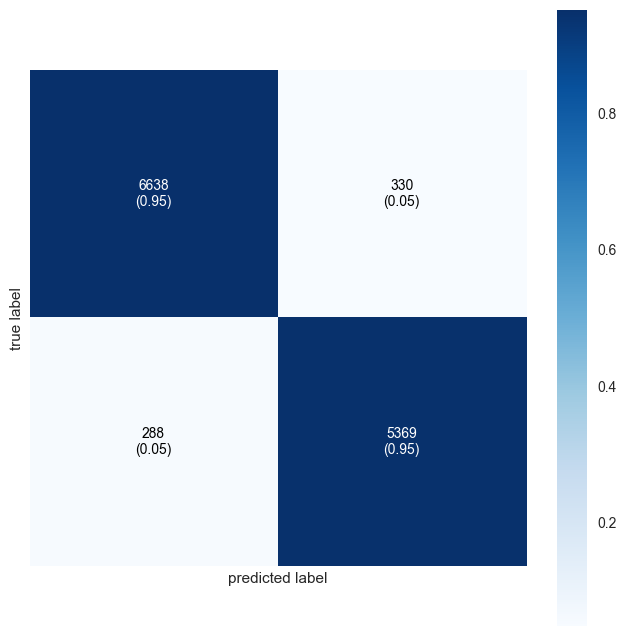

In [ ]:
rf = RandomForestClassifier()
algorithm(rf)

XGBoost

Train set score:  0.9913260456273765
Test set score:  0.9656237623762376
Cross validation score:  0.9659577644038914


precision    recall  f1-score  support
0              0.961161  0.975814  0.968432     6822
1              0.971048  0.953645  0.962267     5803
accuracy       0.965624  0.965624  0.965624        0
macro avg      0.966104  0.964729  0.965350    12625
weighted avg   0.965705  0.965624  0.965598    12625

Confusion Matrix


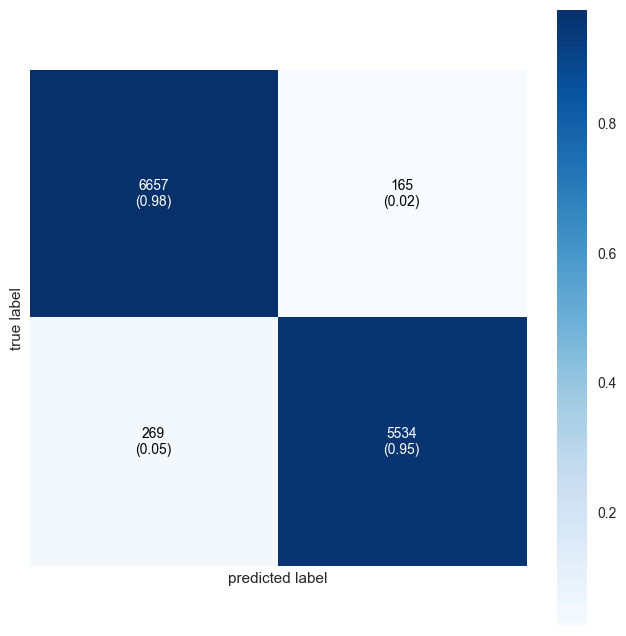

In [ ]:
xgb = XGBClassifier()
algorithm(xgb)

In [ ]:
Technique = ['GaussianNB','BernoulliNB','MLPClassifier','RandomForestClassifier','XGBClassifier']
results = pd.DataFrame({'Technique':Technique, 'Train Score':train_score, 'Test Score':test_score, 'Cross Validation':CV})
display(results)

Technique  Train Score  Test Score  Cross Validation
0              GaussianNB         0.86        0.85              0.85
1             BernoulliNB         0.84        0.84              0.84
2           MLPClassifier         1.00        0.95              0.94
3  RandomForestClassifier         1.00        0.95              0.95
4           XGBClassifier         0.99        0.97              0.97

Saving Model and Vectorizer

In [ ]:
from joblib import dump

#save xgb model as joblib file
dump(xgb, 'model/xgb.joblib')

#save tfidf vectorizer as joblib file
dump(tfidf, 'vectorizer/tfidf.joblib')

['vectorizer/tfidf.joblib']